# -------------------------**E - D - A Project**--------------------------

## **Step - 1  -> import libraries**

In [2]:
from scipy.stats import skew, kurtosis,probplot  
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
import re

## **Step - 2 -> Web Scraping**

In [3]:
'''
base_url = 'https://www.nehruplacemarket.com/laptop-price/laptop-price.php'

# store all laptops
all_laptop_data = []

# loop through all 55 pages
for page_num in range(1, 56):   # 1 to 55
    print(f"Scraping page {page_num} of 55...")

    if page_num == 1:
        url = base_url
    else:
        url = f"{base_url}?pagenum={page_num}"

    # get page
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # find table
    main_table = soup.find('table', {'border': '2', 'cellpadding': '2'})

    if main_table:
        rows = main_table.find_all('tr')[2:]  # skip headers

        for row in rows:
            cells = row.find_all('td')
            if len(cells) == 5:
                brand_model = cells[1].get_text(strip=True)
                spec = cells[2].get_text(strip=True)
                price = cells[3].get_text(strip=True)
                seller = cells[4].get_text(strip=True)

                laptop_info = {
                    'Brand & Model + Spec': f"{brand_model}, {spec}",
                    'Unit Price': f"Rs. {price}",
                    'Seller': seller
                }
                all_laptop_data.append(laptop_info)

    time.sleep(1)  

# show total laptops
print(f"Total laptops found: {len(all_laptop_data)}")
print("=" * 80)

# print first 10 laptops
for i, laptop in enumerate(all_laptop_data[:10]):
    print("{")
    print(f"  'Brand & Model + Spec': '{laptop['Brand & Model + Spec']}',")
    print(f"  'Unit Price': '{laptop['Unit Price']}',")
    print(f"  'Seller': '{laptop['Seller']}'")
    print("}")
    print()

# save to csv
df = pd.DataFrame(all_laptop_data)
df.to_csv('nehru_place_laptop_price_new_all_pages.csv', index=False)
print(f"All {len(all_laptop_data)} items saved to 'nehru_place_laptop_price_10_pages.csv'")
'''

'\nbase_url = \'https://www.nehruplacemarket.com/laptop-price/laptop-price.php\'\n\n# store all laptops\nall_laptop_data = []\n\n# loop through all 55 pages\nfor page_num in range(1, 56):   # 1 to 55\n    print(f"Scraping page {page_num} of 55...")\n\n    if page_num == 1:\n        url = base_url\n    else:\n        url = f"{base_url}?pagenum={page_num}"\n\n    # get page\n    response = requests.get(url)\n    soup = BeautifulSoup(response.text, \'html.parser\')\n\n    # find table\n    main_table = soup.find(\'table\', {\'border\': \'2\', \'cellpadding\': \'2\'})\n\n    if main_table:\n        rows = main_table.find_all(\'tr\')[2:]  # skip headers\n\n        for row in rows:\n            cells = row.find_all(\'td\')\n            if len(cells) == 5:\n                brand_model = cells[1].get_text(strip=True)\n                spec = cells[2].get_text(strip=True)\n                price = cells[3].get_text(strip=True)\n                seller = cells[4].get_text(strip=True)\n\n           

## **Step - 3 -> Importing the dataset**

In [4]:
df = pd.read_csv(r"C:\Users\yedee\OneDrive\INNOMATICS LABS\MODULE 2  ==== EDA\Project\nehru\New folder\nehru_place_laptop_price_10_pages.csv")
df.head()

,Brand & Model + Spec,Unit Price,Seller
0,"HP OmniBook X, Snapdragon® X Elite X1E-78-100,...",Rs. 119500,Mashiva Tech.9990666322
1,"MSI Thin 15, Intel 13th Gen. Core i7-13620H, 4...",Rs. 67780,Panacea Innovative Technologies9990666334
2,"HP LAPTOP EP0341TU, HP Laptop 14 ep0341TU 14 C...",Rs. 39900,K.R.P. IT Solutions8860205927
3,"HP LAPTOP EP0340TU, HP Laptop 14 ep0340TU 14 C...",Rs. 60200,""""
4,"HP LAPTOP FD0466TU, HP Laptop 15 fd0466TU 15.6...",Rs. 54800,""""


In [5]:
df = df.drop_duplicates()

#### **Observations**
**Columns:**
- Brand & Model + Spec → Contains brand name, model number, processor, RAM size, storage size, display info, OS, weight, etc. (all specs in one string).
- Unit Price → Laptop price (currently prefixed with Rs. and stored as string, needs cleaning to numeric).
- Seller → Contains seller shop name + mobile number.

### **Data Quality Issues**
**Brand & Model + Spec column**
- All specifications are packed into one long string.
- Needs parsing into separate columns (brand, model, processor, RAM, storage, GPU, OS, etc.) for analysis.

**Unit Price column**
- Stored as string ("Rs. 119500").
- Needs cleaning (str.replace("Rs.", "").replace(",", "").astype(int) → to numeric).

**Seller column**
- Contains both seller name + phone number.
- Needs splitting into two columns: "Seller_Name" and "Phone_Number".

### **Expected Data**
**Brands**
- HP, MSI, Lenovo, Dell, etc. (from the first word in Brand & Model + Spec).

**Price Range**
- Min Price: Rs. 39,900.
- Max Price: Rs. 119,500.

**Specs (to be extracted)**
- RAM Sizes: e.g., 8GB, 16GB.
- Storage: e.g., 512GB SSD, 1TB SSD.
- Processors: Intel Core i5/i7, Snapdragon Elite, etc.

**Once cleaned, we can able to analyze:**
- Top brands by count & average price
- Price distribution across brands
- Which sellers offer the cheapest/highest laptops
- Specs analysis (RAM/Storage trends, processor demand, etc.)

## **Step - 4 -> Data Extraction**

### a)Brand Extraction

In [6]:
df['Brand & Model + Spec'] = df['Brand & Model + Spec'].str.lstrip(', ').str.strip()
# --- Convert entire 'Brand & Model + Spec' column to uppercase ---
df['Spec_Upper'] = df['Brand & Model + Spec'].str.upper()
# --- Split into words for indexing ---
df['Spec_Split'] = df['Spec_Upper'].str.split()

# --- Extract Brand (first word) ---
brand_list = []
for spec in df['Spec_Split']:
    if len(spec) > 0:
        brand_list.append(spec[0])
    else:
        brand_list.append(np.nan)
df['Brand'] = brand_list
df['Brand'].unique()

array(['HP', 'MSI', 'OLD', 'MICROSOFT', 'DELL', 'LENOVO', 'APPLE', 'ACER',
       'ASUS', 'HP.', 'ACER.', 'DELL.', 'BROTHER', 'ASUS.', 'LENOVO.',
       'LENOV0', 'THINKBOOK', '16', 'M4', 'CANON', 'IDEAPAD', 'HPK',
       'INTEL', 'AMD', 'GIGABYTE', 'LEN0VO', 'THINKBOK', 'ZEBRONICS',
       'PAVILION', 'DYNABOOK', 'LAPTOP', 'CORSAIR', 'LENOVO*', '.MSI',
       'SONY', 'XIAOMI', 'X415JA-EK092TS', 'INSPIRON', 'LG', 'BRAND',
       'LENOVA', 'IPHONE', 'ASUS,', 'HONOR', 'XIOAMI', 'SAMSUNG',
       'CRUCIAL', 'HP-15S', 'MI', 'AVITA', 'HCL', 'TOSHIBA', 'ZOTAC',
       'PHILIPS', 'LENOVO-V15', 'MAC', 'VAIO', 'SIMTRONIC', 'TECHNOTAB'],
      dtype=object)

In [7]:
# Replace  brand names
df['Brand'] = df['Brand'].str.upper()
df['Brand'] = df['Brand'].replace({
    'HP.': 'HP', 'HPK': 'HP', 'HP-15S': 'HP','PAVILION':'HP',
    'DELL.': 'DELL','INSPIRON':'DELL',
    'LENOVO.': 'LENOVO', 'LENOV0': 'LENOVO', 'LEN0VO': 'LENOVO',
    'LENOVA': 'LENOVO', 'LENOVO*': 'LENOVO', 'LENOVO-V15': 'LENOVO',
    'THINKBOOK':'LENOVO','THINKBOK':'LENOVO','IDEAPAD':'LENOVO',
    'ASUS.': 'ASUS', 'ASUS,': 'ASUS',
    'ACER.': 'ACER','VAIO':'SONY',
    '.MSI': 'MSI','MAC':'APPLE','M4':'APPLE',
    'XIOAMI': 'XIAOMI', 'MI': 'XIAOMI','X415JA-EK092T':'other',
    'x415ja-ek092ts':'other'})
df['Brand'].unique()

array(['HP', 'MSI', 'OLD', 'MICROSOFT', 'DELL', 'LENOVO', 'APPLE', 'ACER',
       'ASUS', 'BROTHER', '16', 'CANON', 'INTEL', 'AMD', 'GIGABYTE',
       'ZEBRONICS', 'DYNABOOK', 'LAPTOP', 'CORSAIR', 'SONY', 'XIAOMI',
       'X415JA-EK092TS', 'LG', 'BRAND', 'IPHONE', 'HONOR', 'SAMSUNG',
       'CRUCIAL', 'AVITA', 'HCL', 'TOSHIBA', 'ZOTAC', 'PHILIPS',
       'SIMTRONIC', 'TECHNOTAB'], dtype=object)

#### Types of issues in the raw data
**Case differences**
"HP", "hp", "Hp"
"Dell", "DELL", "dell"
"Lenovo", "LENOVO", "lenovo"

**Special characters**
"HP.", "Lenovo.", "ASUS,", "Lenovo*"
Typos / variant spellings
"LEN0VO", "LENOV0" → Lenovo
"Xioami" → Xiaomi
"Thinkbok" → Thinkbook

**Model names or product lines instead of brand**
"IdeaPad", "Pavilion", "Inspiron", "Thinkbook", "HP-15s", "X415JA-EK092TS"

**Noise / irrelevant entries**
"OLD", "16", "M4", "BRAND", "Laptop"

### b). Extract Model (second and third word)

In [8]:
model_list = []
for spec in df['Spec_Split']:
    if len(spec) > 2:
        model_list.append(spec[1] + ' ' + spec[2])
    elif len(spec) > 1:
        model_list.append(spec[1])
    else:
        model_list.append(np.nan)
df['Model'] = model_list
df['Model'].unique()

array(['OMNIBOOK X,', 'THIN 15,', 'LAPTOP EP0341TU,', ..., 'LENOVO -',
       'G580 (1467),', 'SCOMP TECHNOTAB,'], dtype=object)

#### Model Extraction Summary

**Objective:**  
Extract the **Model name** from the split specifications (`Spec_Split`) column.

**Method:**  
- Look at each record in `Spec_Split` (a list of words from the product title/specs).  
- Applied the following logic:
  1. If the list has **3 or more words** → take the **2nd and 3rd words** (`spec[1] + spec[2]`).  
  2. If the list has **exactly 2 words** → take only the **2nd word** (`spec[1]`).  
  3. If the list has **fewer than 2 words** → assign `NaN`.  

**Result:**  
- Created a new column `Model` with extracted values.  

**Example Output:**

| Spec_Split Example                                   | Extracted Model   |
|------------------------------------------------------|------------------|
| ['DELL', 'Inspiron', '15', 'Intel', 'i5']           | Inspiron 15      |
| ['HP', 'Pavilion', 'Intel', 'i7']                   | Pavilion Intel   |
| ['ASUS', 'VivoBook']                                | VivoBook         |
| ['Apple']                                           | NaN              |

**Notes:**  
- Ensures a consistent approach to capture **brand model identifiers**.  
- Output may need further cleaning (e.g., filtering out unwanted processor/storage terms).  


### c). Extract Processor 

In [9]:
processor_patterns = [
    'I3', 'I5', 'I7', 'I9', 'INTEL CORE I3', 'INTEL CORE I5', 'INTEL CORE I7', 'INTEL CORE I9',
    'CORE 3','CORE 5','CORE 7','DUAL CORE','INTEL CORE 3','INTEL CORE 5','INTEL CORE 7','INTEL CORE 9',
    'ULTRA5', 'ULTRA7', 'ULTRA9','CELERON',
    'RYZEN 3', 'RYZEN 5', 'RYZEN 7', 'RYZEN 9', 'ATHLON', 'R7', 'R5', 'R3',
    'APPLE M1', 'APPLE M2','M1','M2','M3','M4',
    'SNAPDRAGON'
]

In [10]:
processor_list = []
for spec in df['Spec_Upper']:
    found = None
    for proc in processor_patterns:
        if proc.replace(" ", "") in spec.replace(" ", ""):
            found = proc
            break
    if found:
        processor_list.append(found)
    else:
        processor_list.append(np.nan)
df['Processor'] = processor_list
df['Processor'].head()

0    R5
1    I7
2    I3
3    I5
4    I5
Name: Processor, dtype: object

In [11]:

df['Processor'].unique()
df['Processor'] = df['Processor'].replace({
    'I7': 'i7',
    'I3': 'i3',
    'I5': 'i5',
    'I9': 'i9',
    'ULTRA5': 'ultra 5',
    'CORE 7': 'i7',
    'CORE 5': 'i5',
    'ULTRA9': 'ultra 9',
    'ULTRA7': 'ultra 7',
    'DUAL CORE': 'dual core',
    'CELERON': 'celeron',
    'CORE 3': 'i3',
    'APPLE M1':'m1',
    'APPLE M2':'m2',
    'M1':'m1',
    'M2':'m2',
    'M3':'m3',
    'R3':'ryzen 3',
    'R5':'ryzen 5',
    'RYZEN 7':'ryzen 7',
    'RYZEN 9':'ryzen 9',
    'RYZEN 5':'ryzen 5',
    'RYZEN 3':'ryzen 3',  
    'R7':'ryzen 7'
})

df['Processor'].unique()

array(['ryzen 5', 'i7', 'i3', 'i5', 'SNAPDRAGON', 'M4', 'ATHLON',
       'ryzen 9', 'ryzen 7', 'i9', 'ultra 5', nan, 'm3', 'ryzen 3',
       'ultra 7', 'dual core', 'celeron', 'm2', 'm1', 'ultra 9'],
      dtype=object)

#### Processor Extraction Summary

**Objective:**  
Extract the processor type from the raw laptop specification column (`Spec_Upper`) for all laptops in the dataset.

**Method:**  
1. A list of `processor_patterns` was defined, including common Intel, AMD, Apple, and other processors:
   - Intel: `I3`, `I5`, `I7`, `I9`, `Intel Core i3/i5/i7/i9`, `Celeron`, `Dual Core`
   - AMD: `Ryzen 3/5/7/9`, `Athlon`, `R3/R5/R7`
   - Apple: `M1`, `M2`, `M3`, `M4`
   - Other: `Snapdragon`, `Ultra5/7/9`
2. Each laptop specification string was cleaned of spaces, and a pattern match was performed.
3. The first matching processor pattern found in each specification was extracted.
4. If no pattern matched, the value was set as `NaN`.

**Results:**  
- Processor types are now stored in the `Processor` column.
- Missing values (`NaN`) indicate specifications where the processor could not be identified automatically.

**Example Output:**

| Spec_Upper | Processor |
|------------|-----------|
| HP V-14 Intel Core i3 12th Gen ... | I3 |
| MSI Thin 15 Intel Core i7-13620H ... | I7 |
| Apple MacBook Air M2 2024 ... | M2 |
| Lenovo Ideapad Slim 3 ... | I5 |

**Next Steps:**  
- Standardize processor names (e.g., `I3` → `i3`, `RYZEN 5` → `ryzen 5`) for consistency.  
- Handle any missing values if required for analysis.


In [12]:
df['Processor'] = df['Processor'].replace({
    'I7': 'i7',
    'I3': 'i3',
    'I5': 'i5',
    'I9': 'i9',
    'ULTRA5': 'ultra 5',
    'CORE 7': 'i7',
    'CORE 5': 'i5',
    'ULTRA9': 'ultra 9',
    'ULTRA7': 'ultra 7',
    'DUAL CORE': 'dual core',
    'CELERON': 'celeron',
    'CORE 3': 'i3',
    'APPLE M1':'m1',
    'APPLE M2':'m2',
    'M1':'m1',
    'M2':'m2',
    'M3':'m3',
    'R3':'ryzen 3',
    'R5':'ryzen 5',
    'RYZEN 7':'ryzen 7',
    'RYZEN 9':'ryzen 9',
    'RYZEN 5':'ryzen 5',
    'RYZEN 3':'ryzen 3',  
    'R7':'ryzen 7'
})
df['Processor'].unique()

array(['ryzen 5', 'i7', 'i3', 'i5', 'SNAPDRAGON', 'M4', 'ATHLON',
       'ryzen 9', 'ryzen 7', 'i9', 'ultra 5', nan, 'm3', 'ryzen 3',
       'ultra 7', 'dual core', 'celeron', 'm2', 'm1', 'ultra 9'],
      dtype=object)

### d). Extract Storage

In [13]:
s = ['2TB', '1TB', '512GB', '256GB', '128GB', '1 TB', '512 GB', '256 GB', '128 GB',
     '512', '256', '128', '500','500 GB','500 GB HDD', 'TB', 'HDD', 'SSD', '1 HDD', '1 TB HDD', '1 TB SSD']

In [14]:
storage = []
for spec in df['Spec_Upper']:
    found = None
    for st_size in s:
        if st_size.replace(" ", "") in spec.replace(" ", ""):
            found = st_size
            break
    if found:
        storage.append(found)
    else:
        storage.append(np.nan)
df['Storage Size'] = storage
df['Storage Size'].unique()

array(['1TB', '512GB', '256GB', '512', nan, '500', '2TB', 'HDD', '256',
       '128GB', '128', 'SSD', 'TB'], dtype=object)

In [15]:
df['Storage Size'] = df['Storage Size'].replace({
    '1TB': '1 tb',
    '512GB': '512 gb',
    '256GB': '256 gb',
    '512': '512 gb',
    '500': '500 gb',
    '2TB': '2 tb',
    '256': '256 gb',
    '128GB': '128 gb',
    '128': '128 gb',
    'SSD': 'ssd',
    'TB': '1 tb'
})
df['Storage Size'].unique()

array(['1 tb', '512 gb', '256 gb', nan, '500 gb', '2 tb', 'HDD', '128 gb',
       'ssd'], dtype=object)

#### Storage Size Extraction Summary

**Objective:**  
Extract the storage capacity from the `Spec_Upper` column and standardize it for analysis.

**Methodi:**  
- A predefined list `s` containing common storage sizes and formats was used:  
  `['2TB', '1TB', '512GB', '256GB', '128GB', '1 TB', '512 GB', '256 GB', '128 GB', '512', '256', '128', '500','500 GB','500 GB HDD', 'TB', 'HDD', 'SSD', '1 HDD', '1 TB HDD', '1 TB SSD']`
- Iterated over each row in the `Spec_Upper` column:
  - Removed spaces in both the storage pattern and the spec to handle inconsistent formatting.
  - Matched the first occurrence of any pattern in the spec.
  - Appended the matched value to the `Storage Size` list.
  - If no match found, assigned `NaN`.

**Results:**  
- The new column `Storage Size` contains extracted storage information, including HDD/SSD types and capacities.  
- Missing values are represented as `NaN`.

**Example Output:**

| Spec Example                                      | Storage Size |
|--------------------------------------------------|--------------|
| Intel Core i5 8GB/512GB SSD Windows 11 Home     | 512GB        |
| AMD Ryzen 5 16GB/1TB HDD                         | 1TB          |
| Laptop with 8GB RAM and 256 GB SSD              | 256GB        |
| Notebook with 500 GB HDD                         | 500 GB       |
| Ultra-light laptop with SSD                      | SSD          |

**Next Steps:**  
- Standardize storage formats (e.g., `512GB` → `512 gb`) for consistent analysis.  
- Handle missing values (`NaN`) if needed.


### e). Extract GPU

In [16]:
# --- Extract GPU ---
gpu_patterns = [
    'NVIDIA GEFORCE', 'RTX', 'GTX', 
    'AMD RADEON', 'INTEL IRIS', 'INTEL UHD'
]

In [17]:
gpu_list = []
for spec in df['Spec_Upper']:
    found = None
    for gpu in gpu_patterns:
        if gpu.replace(" ", "") in spec.replace(" ", ""):
            found = gpu
            break
    if found:
        gpu_list.append(found)
    else:
        gpu_list.append('Integrated')
df['GPU'] = gpu_list

In [18]:
df['GPU'].unique()

array(['Integrated', 'NVIDIA GEFORCE', 'INTEL IRIS', 'RTX', 'INTEL UHD',
       'AMD RADEON', 'GTX'], dtype=object)

#### GPU Extraction Summary

**Objective:**  
Identify the GPU type (if available) from the `Spec_Upper` column and classify it.

**Method:**  
- Defined common GPU keywords in `gpu_patterns`:  
  `['NVIDIA GEFORCE', 'RTX', 'GTX', 'AMD RADEON', 'INTEL IRIS', 'INTEL UHD']`  
- Iterated through each spec string:
  - Removed spaces for matching consistency.  
  - Checked against each GPU pattern until a match was found.  
  - If matched → assigned that GPU keyword.  
  - If not found → labeled as `"Integrated"`.  

**Results:**  
- A new column `GPU` is created.  
- Contains either a GPU family (`NVIDIA GEFORCE`, `RTX`, `GTX`, `AMD RADEON`, `INTEL IRIS`, `INTEL UHD`) or `"Integrated"` for devices without a dedicated GPU.  

**Example Output:**

| Spec Example                                             | GPU             |
|----------------------------------------------------------|-----------------|
| Intel i7, 16GB RAM, NVIDIA GEFORCE RTX 3060, 512GB SSD  | RTX             |
| AMD Ryzen 5, 8GB RAM, AMD RADEON Graphics, 1TB HDD      | AMD RADEON      |
| Intel i5, 8GB RAM, INTEL IRIS XE Graphics, 512GB SSD    | INTEL IRIS      |
| Intel i3, 4GB RAM, Integrated GPU, 256GB SSD            | Integrated      |

**Next Steps:**  
- Standardize extracted values (e.g., map `"RTX"` and `"GTX"` under `"NVIDIA GEFORCE"`).  
- Extract specific **GPU models** (e.g., `"RTX 3050"`, `"GTX 1650"`) for deeper analysis.  


### f). Extract RAM

In [19]:
r = ['32GB','64GB','8GB','16GB','32 GB','64 GB','8 GB','16 GB','8','16','32','64',
     '24GB','24 GB','6GB','6','6 GB','2GB','2 GB','4GB','4 GB','2','4']

In [20]:
ram = []
for spec in df['Spec_Upper']:
    found = None
    for ram_size in r:
        if ram_size.replace(" ", "") in spec.replace(" ", ""):
            found = ram_size
            break
    if found:
        ram.append(found)
    else:
        ram.append(np.nan)
df['RAM Size'] = ram

In [21]:
df['RAM Size'] = df['RAM Size'].replace({'16GB':'16 gb', '64GB':'64 gb', '8GB':'8 gb',
                                    '32GB':'32 gb', '8':'8 gb', '24GB':'24 gb', 
                                    '6GB':'6 gb', '2':'2 gb', '6':'6 gb',
                                    '32':'32 gb', '4':'4 gb', '16':'16 gb', '64':'64 gb',
                                    '2GB':'2 gb', '4GB':'4 gb'})


In [22]:
df['RAM Size']

0       16 gb
1       64 gb
2        8 gb
3       16 gb
4        8 gb
        ...  
5479     8 gb
5480    32 gb
5481    32 gb
5482     2 gb
5483     4 gb
Name: RAM Size, Length: 4699, dtype: object

##### RAM Size Extraction Summary

**Objective:**  
Identify and extract the **RAM size** from the `Spec_Upper` column.

**Method:**  
1. Defined a list `r` containing RAM size patterns (e.g., `['32GB','64GB','8GB','16GB','24GB','6GB','4GB','2GB', ...]` including variations with and without spaces).  
2. Iterated over each product spec in `Spec_Upper`.  
3. For each spec:
   - Checked if any `ram_size` from list `r` exists inside the string (ignoring spaces).  
   - If found → stored that RAM size.  
   - If not found → assigned `NaN`.  
4. Stored results in a new column `RAM Size`.

**Result:**  
- Extracted a clean RAM size value for each record.  

**Example Output:**

| Spec_Upper Example                                   | Extracted RAM Size |
|------------------------------------------------------|--------------------|
| "HP Pavilion Intel i5 16GB 512GB SSD"                | 16GB               |
| "DELL Inspiron i7 8 GB RAM, 1TB HDD"                 | 8 GB               |
| "ASUS VivoBook Ryzen 5, 32GB, 512GB SSD"             | 32GB               |
| "Apple MacBook Air M2 Chip, 8GB Unified Memory"      | 8GB                |
| "Lenovo IdeaPad 3 Intel i3 No RAM Info"              | NaN                |

**Notes:**  
- Works for different formatting styles (e.g., `8GB`, `8 GB`, `8`).  
- May need a **normalization step** (e.g., converting `8 GB` and `8GB` both to `8GB`) to keep values consistent.  


### g). Motherboard

In [23]:
motherboard = ['MOTHERBOARD','MB']

mb_list = []
for spec in df['Spec_Upper']:
    found = False
    for mb in motherboard:
        if mb in spec:
            found = True
            break
    if found:
        mb_list.append('Yes')
    else:
        mb_list.append('No')
df['Motherboard'] = mb_list
df['Motherboard'].unique()

array(['No', 'Yes'], dtype=object)

##### Motherboard Extraction Summary

**Objective:**  
Detect whether the word **Motherboard** (or abbreviation **MB**) exists in the `Spec_Upper` column.

**Method:**  
- Created a keyword list:  
   
   motherboard = ['MOTHERBOARD','MB']

- Iterated over each product spec in Spec_Upper.
- For each spec:
- Checked if "MOTHERBOARD" or "MB" is present.
- If found → assigned "Yes".
- If not found → assigned "No".
- Stored results in a new column Motherboard.


## **Step - 5 -> Data Cleaning**

#### 1. Brand

In [24]:
df['Brand'] = df['Brand'].str.lower() # Removing White Spaces and Special Charcters and Converting to lower Case

In [25]:
df['Brand'] = df['Brand'].str.replace(r'\s','_',regex = True) # Filling the Spaces With UnderScore(_)

In [26]:
df['Brand'] = df['Brand'].str.replace(r'A-Za-z0-9_','',regex = True) # Removing the Special Charcters

In [27]:
df['Brand'].unique()

array(['hp', 'msi', 'old', 'microsoft', 'dell', 'lenovo', 'apple', 'acer',
       'asus', 'brother', '16', 'canon', 'intel', 'amd', 'gigabyte',
       'zebronics', 'dynabook', 'laptop', 'corsair', 'sony', 'xiaomi',
       'x415ja-ek092ts', 'lg', 'brand', 'iphone', 'honor', 'samsung',
       'crucial', 'avita', 'hcl', 'toshiba', 'zotac', 'philips',
       'simtronic', 'technotab'], dtype=object)

#### 2. Processor

In [28]:
df['Processor'] = df['Processor'].str.lower() # Converting lower case

In [29]:
df['Processor'] = df['Processor'].str.replace(r'\s+', '_', regex=True)

In [30]:
df['Processor'] = df['Processor'].str.replace(r'[^A-Za-z0-9_]','',regex = True) # Removies Speacial Characters excepect Undercsore(_)

In [31]:
df['Processor'].unique()

array(['ryzen_5', 'i7', 'i3', 'i5', 'snapdragon', 'm4', 'athlon',
       'ryzen_9', 'ryzen_7', 'i9', 'ultra_5', nan, 'm3', 'ryzen_3',
       'ultra_7', 'dual_core', 'celeron', 'm2', 'm1', 'ultra_9'],
      dtype=object)

#### 3. RAM

In [32]:
df['RAM Size'] = df['RAM Size'].str.lower()
df['RAM Size'] = df['RAM Size'].str.replace(r'\s+','_',regex=True)
#df['RAM Size'] = df['RAM Size'].str.replace(r'[^a-z0-9_]','',regex=True)


#### 4. Storage

In [33]:
df['Storage Size'] = df['Storage Size'].str.lower()
df['Storage Size'] = df['Storage Size'].str.replace(r'\s+','_',regex = True)
df['Storage Size'] = df['Storage Size'].str.replace(r'[^A-Za-z0-9_]','',regex = True)
df['Storage Size'].unique()

array(['1_tb', '512_gb', '256_gb', nan, '500_gb', '2_tb', 'hdd', '128_gb',
       'ssd'], dtype=object)

#### 5. Model

In [34]:
df['Model'] = df['Model'].str.lower()
df['Model'] = df['Model'].str.replace(r'\s+','_',regex = True)
df['Model'] = df['Model'].str.replace(r'[^A-Za-z0-9_]','',regex = True)
df['Model'].unique()

array(['omnibook_x', 'thin_15', 'laptop_ep0341tu', ..., 'lenovo_',
       'g580_1467', 'scomp_technotab'], dtype=object)

#### 6. GPU

In [35]:
# 1. Lowercase
df['GPU'] = df['GPU'].str.lower()

# 2. Replace spaces with underscore
df['GPU'] = df['GPU'].str.replace(r'\s+', '_', regex=True)

# 3. Remove ONLY special characters (not letters, numbers, underscore)
df['GPU'] = df['GPU'].str.replace(r'[^a-z0-9_]', '', regex=True)
df['GPU'].unique()

array(['integrated', 'nvidia_geforce', 'intel_iris', 'rtx', 'intel_uhd',
       'amd_radeon', 'gtx'], dtype=object)

In [36]:
df['GPU'].dtype

dtype('O')

#### Unit Price

In [37]:
#  Remove all whitespace inside GPU column


#  Remove all non-numeric characters from unit_price
df['Unit Price'] = df['Unit Price'].replace(r'[^0-9]', '', regex=True)

#  Convert unit_price to numeric (after cleaning)
df['Unit Price'] = pd.to_numeric(df['Unit Price'], errors='coerce')

#  Replace 0 and 1 values with NaN
df['Unit Price'] = df['Unit Price'].replace([0,1], np.nan)

df['Unit Price'].describe

# List of invalid unit_price values to remove
invalid_prices = [0, 1, 309, 700, 1000, 1500,1897,2000]

# Keep only rows where unit_price is NOT in the invalid list
df = df[~df['Unit Price'].isin(invalid_prices)]

# Reset index (optional, to clean up row numbers after dropping)
df = df.reset_index(drop=True)

print(df.head())   # check first few rows


                                Brand & Model + Spec  Unit Price  \
0  HP OmniBook X, Snapdragon® X Elite X1E-78-100,...    119500.0   
1  MSI Thin 15, Intel 13th Gen. Core i7-13620H, 4...     67780.0   
2  HP LAPTOP EP0341TU, HP Laptop 14 ep0341TU 14 C...     39900.0   
3  HP LAPTOP EP0340TU, HP Laptop 14 ep0340TU 14 C...     60200.0   
4  HP LAPTOP FD0466TU, HP Laptop 15 fd0466TU 15.6...     54800.0   

                                      Seller  \
0                    Mashiva Tech.9990666322   
1  Panacea Innovative Technologies9990666334   
2              K.R.P. IT Solutions8860205927   
3                                          "   
4                                          "   

                                          Spec_Upper  \
0  HP OMNIBOOK X, SNAPDRAGON® X ELITE X1E-78-100,...   
1  MSI THIN 15, INTEL 13TH GEN. CORE I7-13620H, 4...   
2  HP LAPTOP EP0341TU, HP LAPTOP 14 EP0341TU 14 C...   
3  HP LAPTOP EP0340TU, HP LAPTOP 14 EP0340TU 14 C...   
4  HP LAPTOP FD0466TU,

## **Step - 6 -> Droping unwanted Columns**

In [38]:
df.columns

Index(['Brand & Model + Spec', 'Unit Price', 'Seller', 'Spec_Upper',
       'Spec_Split', 'Brand', 'Model', 'Processor', 'Storage Size', 'GPU',
       'RAM Size', 'Motherboard'],
      dtype='object')

In [39]:
df = df.drop(columns = {'Brand & Model + Spec','Spec_Upper','Spec_Split','Seller'})

In [40]:
df.columns

Index(['Unit Price', 'Brand', 'Model', 'Processor', 'Storage Size', 'GPU',
       'RAM Size', 'Motherboard'],
      dtype='object')

In [41]:
df.isnull().sum()

Unit Price       49
Brand             0
Model             0
Processor       264
Storage Size    376
GPU               0
RAM Size         64
Motherboard       0
dtype: int64

In [42]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(r'\s+','_',regex = True)
df.columns

Index(['unit_price', 'brand', 'model', 'processor', 'storage_size', 'gpu',
       'ram_size', 'motherboard'],
      dtype='object')

In [43]:
df = df[['brand', 'model', 'processor', 'ram_size','storage_size','gpu','motherboard','unit_price']]

In [44]:
df.columns

Index(['brand', 'model', 'processor', 'ram_size', 'storage_size', 'gpu',
       'motherboard', 'unit_price'],
      dtype='object')

## **Step - 7 -> Missing Values**

In [45]:
# Drop duplicates
df = df.drop_duplicates()

In [46]:
df.isnull().sum()

brand             0
model             0
processor       255
ram_size         62
storage_size    355
gpu               0
motherboard       0
unit_price       42
dtype: int64

In [47]:
missing_summary = pd.DataFrame({'Missing values':df.isnull().sum(),
                               'Percentage': round(df.isnull().sum()/len(df)*100,2)})
missing_summary

,Missing values,Percentage
brand,0,0.00
model,0,0.00
processor,255,7.32
ram_size,62,1.78
storage_size,355,10.19
gpu,0,0.00
motherboard,0,0.00
unit_price,42,1.21


In [48]:
df.head()

,brand,model,processor,ram_size,storage_size,gpu,motherboard,unit_price
0,hp,omnibook_x,ryzen_5,16_gb,1_tb,integrated,No,119500.0
1,msi,thin_15,i7,64_gb,512_gb,nvidia_geforce,No,67780.0
2,hp,laptop_ep0341tu,i3,8_gb,512_gb,integrated,No,39900.0
3,hp,laptop_ep0340tu,i5,16_gb,512_gb,integrated,No,60200.0
4,hp,laptop_fd0466tu,i5,8_gb,512_gb,integrated,No,54800.0


In [49]:
# Filling missing values with mode
df['processor'] = df['processor'].fillna(df['processor'].mode()[0])

In [50]:
df['storage_size'] = df['storage_size'].fillna(df['storage_size'].mode()[0])

In [51]:
df['ram_size'] = df['ram_size'].fillna(df['ram_size'].mode()[0])

In [52]:
df['unit_price'] = df['unit_price'].fillna(df['unit_price'].mean())
#df['Unit Price'] = df['Unit Price'].fillna(df['Unit Price'].mean()).astype(int)


In [53]:

pd.set_option('display.float_format', '{:.0f}'.format)

In [54]:
df['unit_price'] =df['unit_price'].astype('int')

In [55]:
df.describe()

,unit_price
count,3484
mean,63553
std,50839
min,3250
25%,35950
50%,54495
75%,75522
max,1115001


In [56]:
df

,brand,model,processor,ram_size,storage_size,gpu,motherboard,unit_price
0,hp,omnibook_x,ryzen_5,16_gb,1_tb,integrated,No,119500
1,msi,thin_15,i7,64_gb,512_gb,nvidia_geforce,No,67780
2,hp,laptop_ep0341tu,i3,8_gb,512_gb,integrated,No,39900
3,hp,laptop_ep0340tu,i5,16_gb,512_gb,integrated,No,60200
4,hp,laptop_fd0466tu,i5,8_gb,512_gb,integrated,No,54800
...,...,...,...,...,...,...,...,...
4682,dell,vostro_2520,dual_core,8_gb,512_gb,integrated,No,25000
4683,dell,vostro_1450,i3,32_gb,500_gb,integrated,No,27000
4684,dell,vostro_2520,dual_core,32_gb,512_gb,integrated,No,23500
4685,dell,vostro_1450,i3,2_gb,500_gb,integrated,No,30000


In [57]:
missing_summary = pd.DataFrame({'Missing values':df.isnull().sum(),
                               'Percentage': round(df.isnull().sum()/len(df)*100,2)})
missing_summary

,Missing values,Percentage
brand,0,0
model,0,0
processor,0,0
ram_size,0,0
storage_size,0,0
gpu,0,0
motherboard,0,0
unit_price,0,0


In [58]:
df.shape

(3484, 8)

In [59]:
df

,brand,model,processor,ram_size,storage_size,gpu,motherboard,unit_price
0,hp,omnibook_x,ryzen_5,16_gb,1_tb,integrated,No,119500
1,msi,thin_15,i7,64_gb,512_gb,nvidia_geforce,No,67780
2,hp,laptop_ep0341tu,i3,8_gb,512_gb,integrated,No,39900
3,hp,laptop_ep0340tu,i5,16_gb,512_gb,integrated,No,60200
4,hp,laptop_fd0466tu,i5,8_gb,512_gb,integrated,No,54800
...,...,...,...,...,...,...,...,...
4682,dell,vostro_2520,dual_core,8_gb,512_gb,integrated,No,25000
4683,dell,vostro_1450,i3,32_gb,500_gb,integrated,No,27000
4684,dell,vostro_2520,dual_core,32_gb,512_gb,integrated,No,23500
4685,dell,vostro_1450,i3,2_gb,500_gb,integrated,No,30000


In [60]:
df =df[~df['brand'].str.contains('16',na=False)]

In [61]:
# Save cleaned DataFrame to CSV
#df.to_csv('EDA_Project_clean_data.csv', index=False)

# Confirm current working directory
import os
print("File saved at:", os.path.join(os.getcwd(), "EDA_Project_clean_data.csv"))


File saved at: C:\Users\yedee\EDA_Project_clean_data.csv


## **Step - 8 -> Analaysis**

In [62]:
df1 = pd.read_csv(r"C:\Users\yedee\OneDrive\INNOMATICS LABS\MODULE 2  ==== EDA\Project\nehru\EDA_Project_clean_data.csv")

In [63]:
df1.head()

,brand,model,processor,ram_size,storage_size,gpu,motherboard,unit_price
0,hp,omnibook_x,ryzen_5,16_gb,1_tb,integrated,No,119500
1,msi,thin_15,i7,64_gb,512_gb,nvidia_geforce,No,67780
2,hp,laptop_ep0341tu,i3,8_gb,512_gb,integrated,No,39900
3,hp,laptop_ep0340tu,i5,16_gb,512_gb,integrated,No,60200
4,hp,laptop_fd0466tu,i5,8_gb,512_gb,integrated,No,54800


In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3484 entries, 0 to 3483
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3484 non-null   object
 1   model         3484 non-null   object
 2   processor     3484 non-null   object
 3   ram_size      3484 non-null   object
 4   storage_size  3484 non-null   object
 5   gpu           3484 non-null   object
 6   motherboard   3484 non-null   object
 7   unit_price    3484 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 217.9+ KB


In [65]:
df1.describe()

,unit_price
count,3484
mean,63553
std,50839
min,3250
25%,35950
50%,54495
75%,75522
max,1115001


**1. Brand**

In [66]:
print(df['brand'].unique())

['hp' 'msi' 'old' 'microsoft' 'dell' 'lenovo' 'apple' 'acer' 'asus'
 'brother' 'canon' 'intel' 'amd' 'gigabyte' 'zebronics' 'dynabook'
 'laptop' 'sony' 'xiaomi' 'x415ja-ek092ts' 'lg' 'brand' 'iphone' 'honor'
 'samsung' 'crucial' 'avita' 'hcl' 'toshiba' 'zotac' 'philips' 'technotab']


In [67]:
df['brand'] = df['brand'].replace({'x415ja-ek092ts':'other'})

C:\Users\yedee\AppData\Local\Temp\ipykernel_23776\653117507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brand'] = df['brand'].replace({'x415ja-ek092ts':'other'})


In [68]:
print(df['brand'].value_counts())

brand
hp           1164
lenovo        720
dell          660
asus          259
apple         153
acer          153
msi           144
hcl            38
microsoft      37
samsung        33
toshiba        29
sony           24
xiaomi         14
gigabyte       10
intel           7
dynabook        7
avita           5
amd             5
brother         4
zebronics       3
lg              2
honor           2
zotac           1
crucial         1
philips         1
laptop          1
iphone          1
brand           1
other           1
canon           1
old             1
technotab       1
Name: count, dtype: int64


In [69]:
print(df['brand'].value_counts().head(10))


brand
hp           1164
lenovo        720
dell          660
asus          259
apple         153
acer          153
msi           144
hcl            38
microsoft      37
samsung        33
Name: count, dtype: int64


In [70]:
print(df['brand'].nunique()) # 33

32


**Model**

In [71]:
print(df['model'].unique())

['omnibook_x' 'thin_15' 'laptop_ep0341tu' ... 'lenovo_' 'g580_1467'
 'scomp_technotab']


In [72]:
print(df['model'].value_counts())

model
macbook_air        77
ideapad_slim       75
thinkpad_e14       69
victus_gaming      52
pavilion_14        40
                   ..
lenovo_t460         1
stealth_15          1
inspiron_5620       1
a14vgg239in_msi     1
scomp_technotab     1
Name: count, Length: 1576, dtype: int64


In [73]:
print(df['model'].nunique()) # 1577

1576


**processor**

In [74]:
print(df['processor'].unique())

['ryzen_5' 'i7' 'i3' 'i5' 'snapdragon' 'm4' 'athlon' 'ryzen_9' 'ryzen_7'
 'i9' 'ultra_5' 'm3' 'ryzen_3' 'ultra_7' 'dual_core' 'celeron' 'm2' 'm1'
 'ultra_9']


In [75]:
print(df['processor'].value_counts())

processor
i5            1479
i3             756
i7             511
ryzen_5        161
ryzen_7        126
ryzen_3        100
m1              65
i9              55
m2              53
dual_core       40
celeron         29
ultra_5         26
ultra_7         20
athlon          18
ryzen_9         16
m4              11
m3               6
ultra_9          6
snapdragon       5
Name: count, dtype: int64


In [76]:
print(df['processor'].nunique())

19


**Ram**

In [77]:
print(df['ram_size'].unique())

['16_gb' '64_gb' '8_gb' '32_gb' '24_gb' '6_gb' '2_gb' '4_gb']


In [78]:
print(df['ram_size'].value_counts())

ram_size
8_gb     1856
16_gb    1151
6_gb      167
32_gb     110
4_gb       83
2_gb       72
64_gb      38
24_gb       6
Name: count, dtype: int64


In [79]:
print(df['ram_size'].nunique())

8


**storage**

In [80]:
print(df['gpu'].unique())

['integrated' 'nvidia_geforce' 'intel_iris' 'rtx' 'intel_uhd' 'amd_radeon'
 'gtx']


In [81]:
print(df['gpu'].value_counts())

gpu
integrated        2576
rtx                331
intel_iris         193
nvidia_geforce     189
intel_uhd           97
amd_radeon          75
gtx                 22
Name: count, dtype: int64


In [82]:
print(df['gpu'].nunique())

7


**motherboard**

In [83]:
print(df['motherboard'].unique())

print(df['motherboard'].value_counts())

print(df['motherboard'].nunique())

['No' 'Yes']
motherboard
No     3363
Yes     120
Name: count, dtype: int64
2


**unit_price**

In [84]:
print(df['unit_price'].unique())

print(df['unit_price'].value_counts())

print(df['unit_price'].nunique())

[119500  67780  39900 ...  49700  20900   5499]
unit_price
63553     41
34500     27
29000     21
31500     20
35500     19
          ..
24999      1
156990     1
67799      1
100696     1
5499       1
Name: count, Length: 1575, dtype: int64
1575


In [85]:
print(df['storage_size'].unique())

print(df['storage_size'].value_counts())

print(df['storage_size'].nunique())

['1_tb' '512_gb' '256_gb' '500_gb' '2_tb' 'hdd' '128_gb' 'ssd']
storage_size
512_gb    2322
1_tb       617
256_gb     248
500_gb     239
128_gb      19
2_tb        15
hdd         13
ssd         10
Name: count, dtype: int64
8


### Bi - Variate

In [86]:
df['product_id'] = range(0,len(df))
df.columns

df = df[['product_id','brand', 'model', 'processor', 'ram_size', 'storage_size', 'gpu',
       'motherboard', 'unit_price']]

C:\Users\yedee\AppData\Local\Temp\ipykernel_23776\116919817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['product_id'] = range(0,len(df))


**1. Average unit_price per brand**

In [87]:
p1 = pd.pivot_table(df,index='brand',values='unit_price',aggfunc='mean')
p1

,unit_price
brand,
acer,56815
amd,14429
apple,114267
asus,67411
avita,23480
brand,36965
brother,16900
canon,7699
crucial,31500


**2. Count of models per processor**

In [88]:
p2 = pd.pivot_table(df,index = 'processor', values = 'model',aggfunc = 'count')
p2.sort_values(by = 'model',ascending = False)

,model
processor,
i5,1479
i3,756
i7,511
ryzen_5,161
ryzen_7,126
ryzen_3,100
m1,65
i9,55
m2,53


**3. Average price by brand and RAM size**

In [89]:
p3 =pd.pivot_table(df,index = 'ram_size',columns = 'brand',values = 'unit_price',aggfunc = 'mean')
p3

brand,acer,amd,apple,asus,avita,brand,brother,canon,crucial,dell,...,old,other,philips,samsung,sony,technotab,toshiba,xiaomi,zebronics,zotac
ram_size,,,,,,,,,,,,,,,,,,,,,
16_gb,70701,NaN,148874,84039,NaN,NaN,NaN,NaN,NaN,80689,...,NaN,NaN,NaN,41048,NaN,NaN,52500,64999,41977,NaN
24_gb,NaN,NaN,136624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2_gb,84070,NaN,232183,32547,NaN,NaN,20399,NaN,NaN,35809,...,NaN,NaN,5609,NaN,NaN,NaN,NaN,72422,NaN,4531
32_gb,NaN,NaN,NaN,138257,NaN,NaN,15699,NaN,NaN,128117,...,NaN,NaN,NaN,15990,NaN,NaN,51660,50152,NaN,NaN
4_gb,52276,NaN,63553,41740,NaN,NaN,NaN,7699,NaN,34329,...,NaN,NaN,NaN,NaN,66999,5499,55399,74999,3250,NaN
64_gb,26635,NaN,NaN,44900,21000,NaN,12000,NaN,NaN,30989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6_gb,49959,17395,90760,32186,23000,NaN,19500,NaN,NaN,38185,...,NaN,NaN,NaN,NaN,NaN,NaN,49900,55500,NaN,NaN
8_gb,42316,12452,105129,57115,25200,36965,NaN,NaN,31500,50020,...,16000,40999,NaN,59052,57899,NaN,36800,115399,NaN,NaN


**4. Maximum and minimum price per brand**

In [90]:
p4 = pd.pivot_table(df,index = 'brand',values = 'unit_price',aggfunc = ['min','max'])
p4

,min,max
,unit_price,unit_price
brand,,
acer,19999,189990
amd,8769,22190
apple,24400,349900
asus,6399,439990
avita,21000,25200
brand,36965,36965
brother,12000,20399
canon,7699,7699


In [91]:
pivot4 = df.pivot_table(index='brand', values='unit_price', aggfunc=['max', 'min'])
pivot4


,max,min
,unit_price,unit_price
brand,,
acer,189990,19999
amd,22190,8769
apple,349900,24400
asus,439990,6399
avita,25200,21000
brand,36965,36965
brother,20399,12000
canon,7699,7699


**5. Count of products by brand and storage size**

In [92]:
p5 = pd.pivot_table(df,index='storage_size',columns = 'brand',values = 'product_id',aggfunc='count')
p5

brand,acer,amd,apple,asus,avita,brand,brother,canon,crucial,dell,...,old,other,philips,samsung,sony,technotab,toshiba,xiaomi,zebronics,zotac
storage_size,,,,,,,,,,,,,,,,,,,,,
128_gb,NaN,NaN,7,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
1_tb,30,NaN,12,49,NaN,NaN,NaN,NaN,NaN,129,...,NaN,1,NaN,4,NaN,NaN,NaN,2,1,NaN
256_gb,3,NaN,93,10,4,1,1,NaN,NaN,37,...,1,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
2_tb,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500_gb,4,1,NaN,11,NaN,NaN,NaN,NaN,NaN,56,...,NaN,NaN,NaN,9,8,NaN,21,NaN,NaN,NaN
512_gb,116,4,41,178,NaN,NaN,3,1,1,432,...,NaN,NaN,1,17,15,1,8,12,2,1
hdd,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ssd,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**6. Sum of unit_price per GPU**

In [93]:
p6 = pd.pivot_table(df,index = 'unit_price',values = 'gpu',aggfunc='sum')
p6

,gpu
unit_price,
3250,integrated
3600,integrated
4000,integrated
4500,integrated
4531,integrated
...,...
439990,rtx
529000,rtx
980499,rtx


**7. Multi-level aggregation: brand and processor**

In [94]:
pivot7 = df.pivot_table(index=['brand', 'processor'], values='unit_price', aggfunc='mean')
pivot7


unit_price
brand     processor            
acer      celeron         24656
          dual_core       19999
          i3              36625
          i5              56285
          i7              83557
...                         ...
toshiba   i7              57700
xiaomi    i5              92244
zebronics i5               3250
          i7              41977
zotac     ryzen_3          4531

[141 rows x 1 columns]

**8. Count of products by brand, RAM size, and storage size**

In [95]:
pivot8 = df.pivot_table(columns=['brand', 'ram_size'], index='storage_size', values='product_id', aggfunc='count', fill_value=0)
pivot8


brand         acer                            amd      apple        ...  \
ram_size     16_gb 2_gb 4_gb 64_gb 6_gb 8_gb 6_gb 8_gb 16_gb 24_gb  ...   
storage_size                                                        ...   
128_gb           0    0    0     0    0    0    0    0     0     0  ...   
1_tb            16    0    1     0    1   12    0    0     3     0  ...   
256_gb           0    0    0     0    0    3    0    0     4     0  ...   
2_tb             0    0    0     0    0    0    0    0     0     0  ...   
500_gb           0    0    0     2    1    1    0    1     0     0  ...   
512_gb          58    2    1     0    4   51    2    2    10     2  ...   
hdd              0    0    0     0    0    0    0    0     0     0  ...   
ssd              0    0    0     0    0    0    0    0     0     0  ...   

brand        toshiba xiaomi                           zebronics      zotac  
ram_size        8_gb  16_gb 2_gb 32_gb 4_gb 6_gb 8_gb     16_gb 4_gb  2_gb  
storage_size                                                                
128_gb             0      0    0     0    0    0    0         0    0     0  
1_tb               0      0    0     0    0    0    2         1    0     0  
256_gb             0      0    0     0    0    0    0         0    0     0  
2_tb               0      0    0     0    0    0    0         0    0     0  
500_gb            16      0    0     0    0    0    0         0    0     0  
512_gb             5      1    1     2    1    1    6         1    1     1  
hdd                0      0    0     0    0    0    0         0    0     0  
ssd                0      0    0     0    0    0    0         0    0     0  

[8 rows x 105 columns]

## **Step - 9 -> Plots**

**1. Numeric column (unit_price)**

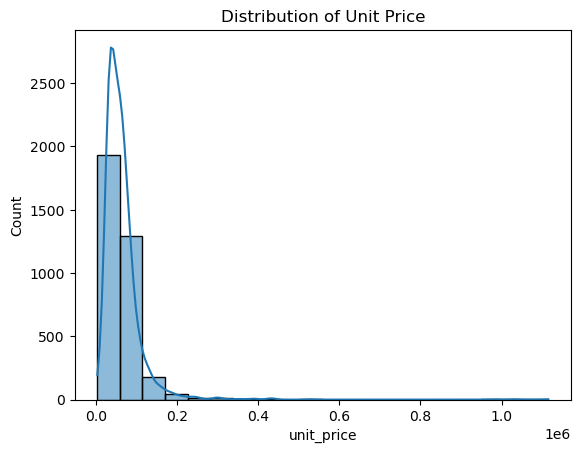

In [96]:
sns.histplot(df['unit_price'],bins = 20,kde=True)
plt.title('Distribution of Unit Price')
plt.show()

**2. Q-Q plot for the unit_price**

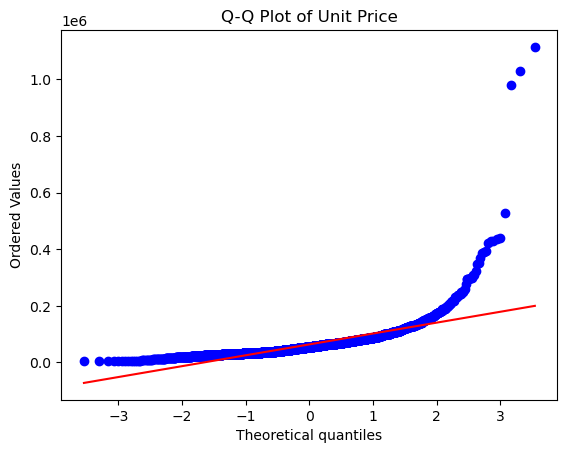

In [97]:
stats.probplot(df['unit_price'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Unit Price")
plt.show()

**3. Categorical column (brand)**

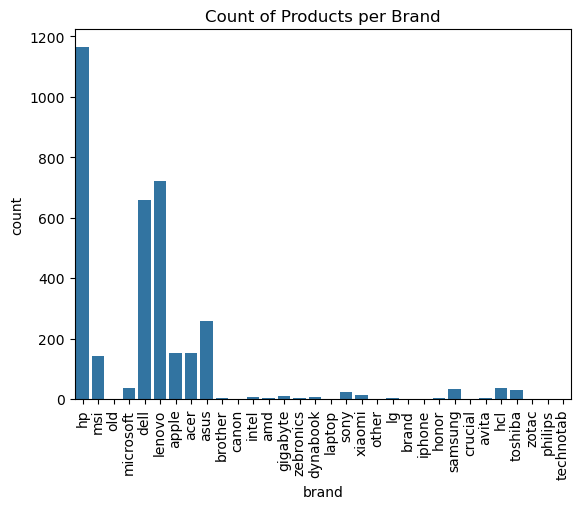

In [98]:
sns.countplot(df,x='brand')
plt.title('Count of Products per Brand')
plt.xticks(rotation=90)
plt.show()

**Bivariate Analysis**

**4. unit_price vs ram_size**

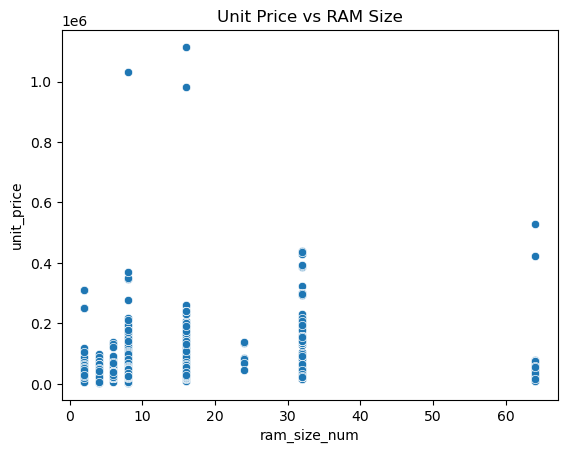

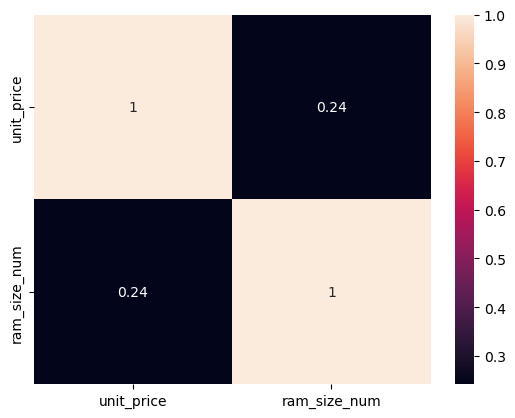

In [99]:
# Convert 'ram_size' to numeric
df['ram_size_num'] = df['ram_size'].str.replace('_gb','').astype(int)

# Scatter plot
sns.scatterplot(x='ram_size_num', y='unit_price', data=df)
plt.title("Unit Price vs RAM Size")
plt.show()

# Correlation heatmap
sns.heatmap(df[['unit_price','ram_size_num']].corr(), annot=True)
plt.show()


**Categorical vs Numeric**

**brand vs unit_price**

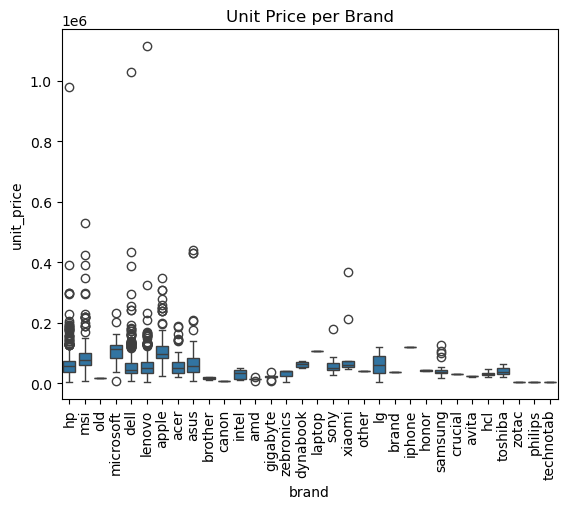

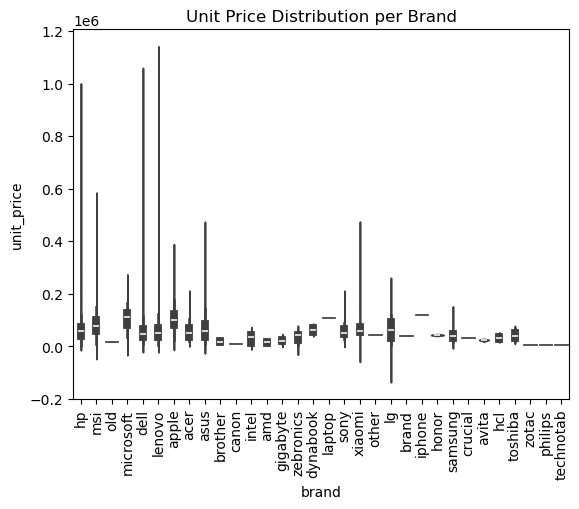

In [100]:
# Boxplot
sns.boxplot(x='brand', y='unit_price', data=df)
plt.title("Unit Price per Brand")
plt.xticks(rotation=90)
plt.show()

# Violin plot
sns.violinplot(x='brand', y='unit_price', data=df)
plt.title("Unit Price Distribution per Brand")
plt.xticks(rotation=90)
plt.show()


**Categorical vs Categorical**

**brand vs gpu**

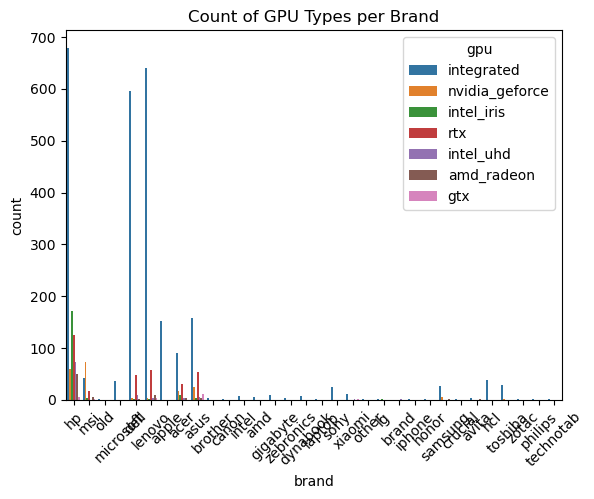

In [101]:
# Count plot with hue
sns.countplot(x='brand', hue='gpu', data=df)
plt.title("Count of GPU Types per Brand")
plt.xticks(rotation=45)
plt.show()



## **Step - 10 -> Stats**

**Grouped statistics**

In [102]:
# Average unit price by brand
print(df.groupby('brand')['unit_price'].mean())

brand
acer         56815
amd          14429
apple       114267
asus         67411
avita        23480
brand        36965
brother      16900
canon         7699
crucial      31500
dell         57786
dynabook     62117
gigabyte     19950
hcl          30914
honor        42500
hp           61325
intel        29857
iphone      119900
laptop      107799
lenovo       57694
lg           61494
microsoft   111175
msi          98933
old          16000
other        40999
philips       5609
samsung      44654
sony         58278
technotab     5499
toshiba      40997
xiaomi       92244
zebronics    29068
zotac         4531
Name: unit_price, dtype: float64


In [103]:
# Count of products per processor
print(df.groupby('processor')['product_id'].count())

processor
athlon          18
celeron         29
dual_core       40
i3             756
i5            1479
i7             511
i9              55
m1              65
m2              53
m3               6
m4              11
ryzen_3        100
ryzen_5        161
ryzen_7        126
ryzen_9         16
snapdragon       5
ultra_5         26
ultra_7         20
ultra_9          6
Name: product_id, dtype: int64


In [104]:
# Multiple stats: mean, min, max per brand
df.groupby('brand')['unit_price'].agg(['mean','min','max'])

,mean,min,max
brand,,,
acer,56815,19999,189990
amd,14429,8769,22190
apple,114267,24400,349900
asus,67411,6399,439990
avita,23480,21000,25200
brand,36965,36965,36965
brother,16900,12000,20399
canon,7699,7699,7699
crucial,31500,31500,31500


In [105]:
# Average price per brand and GPU
pivot = df.pivot_table(index='brand', columns='gpu', values='unit_price', aggfunc='mean', fill_value=0)
pivot


gpu,amd_radeon,gtx,integrated,intel_iris,intel_uhd,nvidia_geforce,rtx
brand,,,,,,,
acer,35660,0,47430,47003,34953,86797,75553
amd,0,0,14429,0,0,0,0
apple,0,0,114267,0,0,0,0
asus,58833,86334,51866,45350,29202,89897,104973
avita,21000,0,24100,0,0,0,0
brand,0,0,0,0,36965,0,0
brother,0,0,16900,0,0,0,0
canon,0,0,7699,0,0,0,0
crucial,0,0,31500,0,0,0,0


**Skewness & kurtosis (distribution stats)**

In [106]:
print("Skewness of unit_price:", skew(df['unit_price']))
print("Kurtosis of unit_price:", kurtosis(df['unit_price']))

Skewness of unit_price: 8.11925270158934
Kurtosis of unit_price: 128.68228671210642


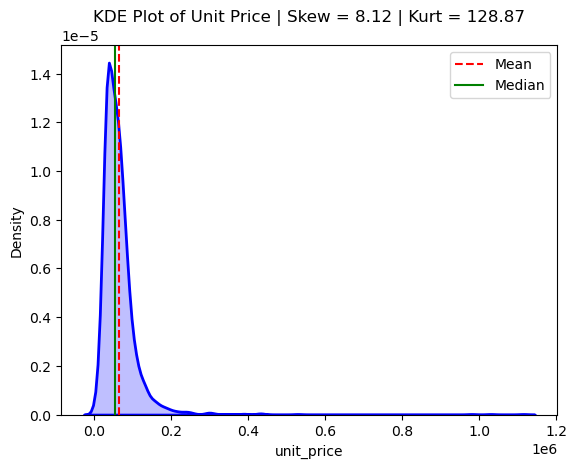

In [107]:
# KDE Plot for unit_price
sns.kdeplot(df['unit_price'], fill=True, linewidth=2, color='blue')

# Add mean and median lines to show skewness visually
plt.axvline(df['unit_price'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['unit_price'].median(), color='green', linestyle='-', label='Median')

# Title with skewness & kurtosis
plt.title('KDE Plot of Unit Price | Skew = {:.2f} | Kurt = {:.2f}'.format(
    df['unit_price'].skew(), df['unit_price'].kurt()
))

plt.legend()
plt.show()

Skewness of unit_price: 8.11925270158934
Kurtosis of unit_price: 128.68228671210642


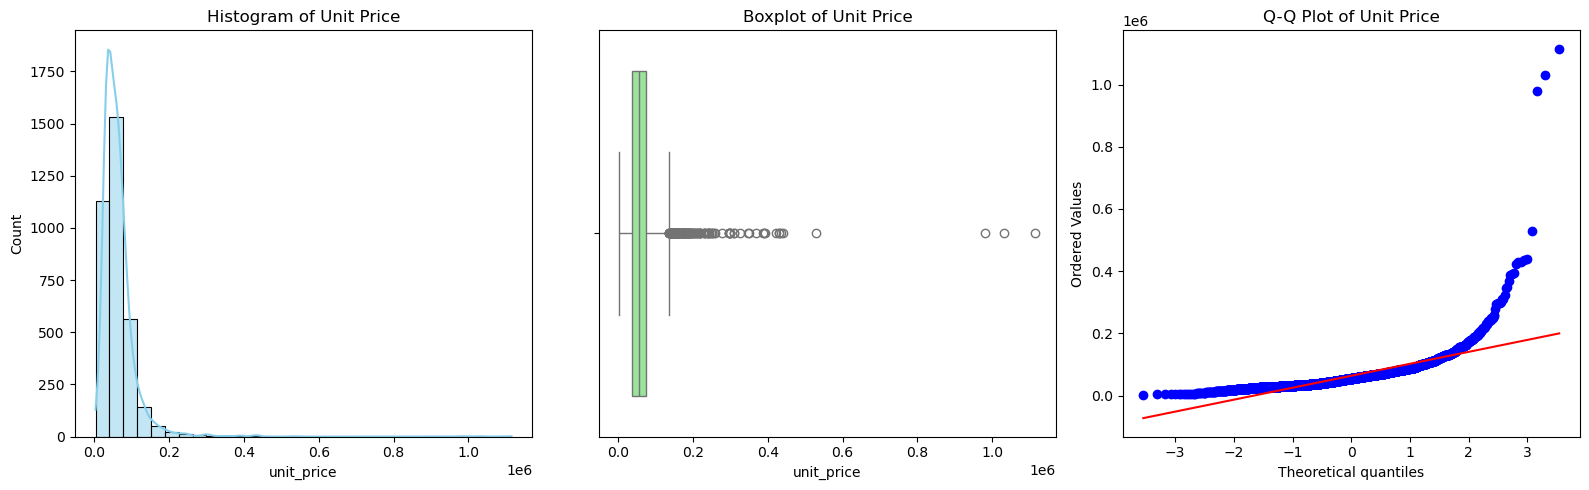

In [108]:

# Skewness and Kurtosis
print("Skewness of unit_price:", skew(df['unit_price']))
print("Kurtosis of unit_price:", kurtosis(df['unit_price']))

# Set figure size
plt.figure(figsize=(16,5))

# Histogram + KDE
plt.subplot(1,3,1)
sns.histplot(df['unit_price'], kde=True, bins=30, color='skyblue')
plt.title('Histogram of Unit Price')

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=df['unit_price'], color='lightgreen')
plt.title('Boxplot of Unit Price')

# Q-Q plot
plt.subplot(1,3,3)
probplot(df['unit_price'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Unit Price')

plt.tight_layout()
plt.show()


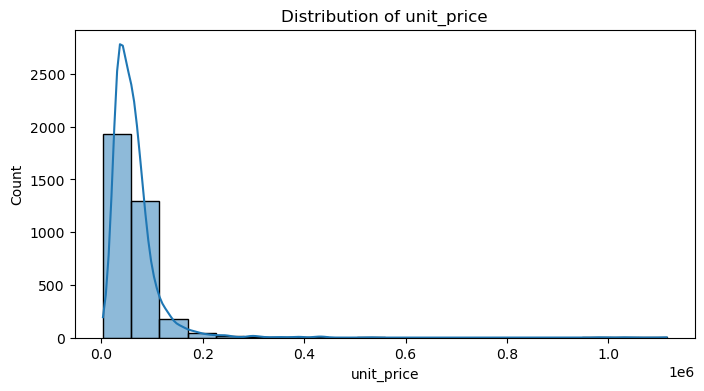

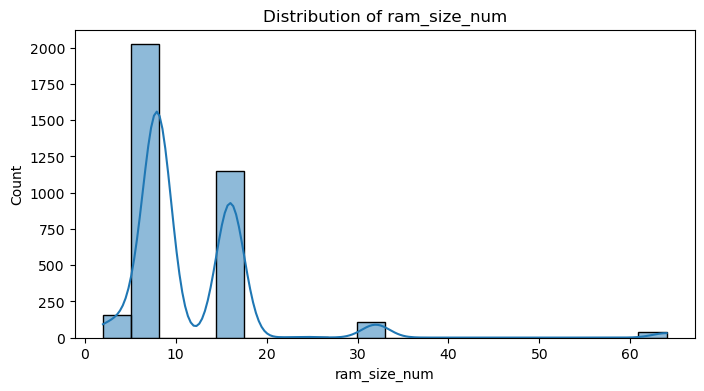

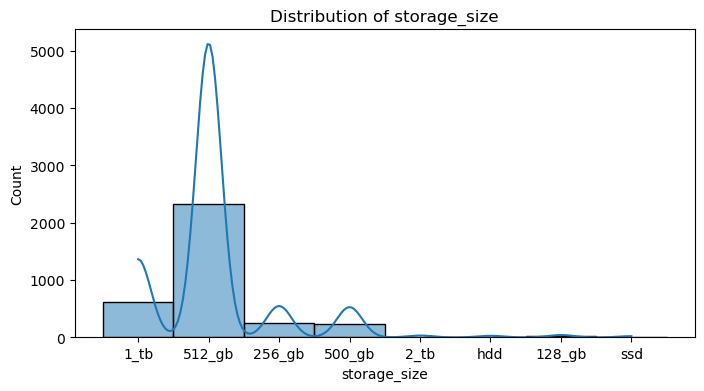

In [109]:
numeric_cols = ['unit_price', 'ram_size_num', 'storage_size']

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

**Categorical columns (brand, processor, gpu, ram_size, storage_size)**

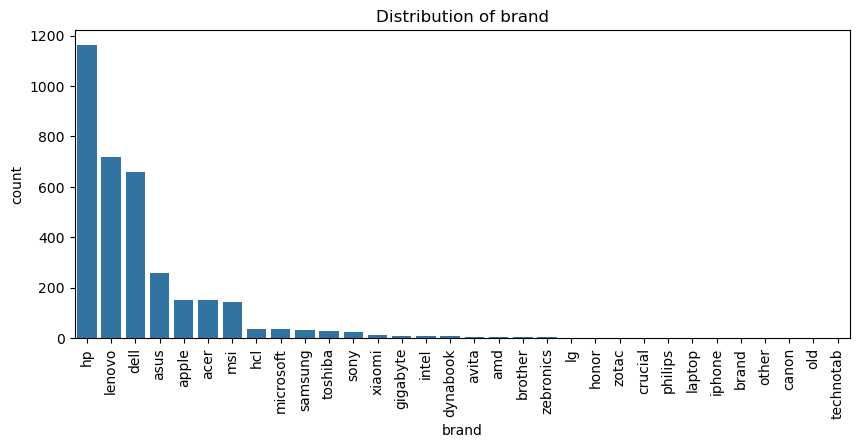

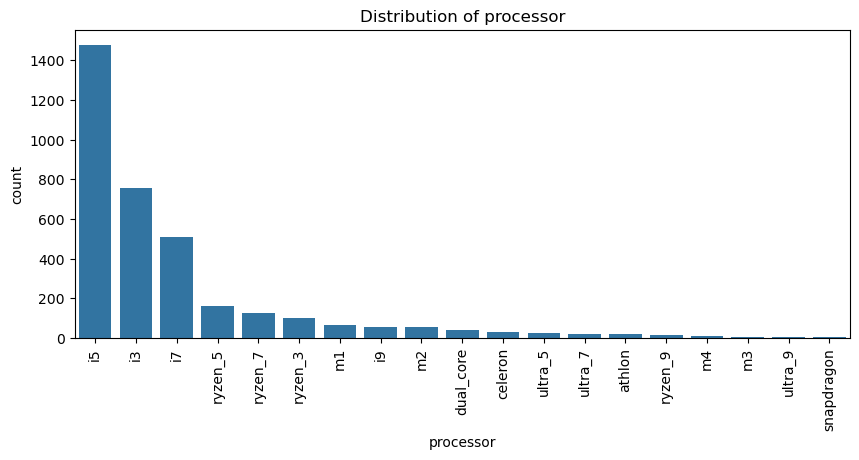

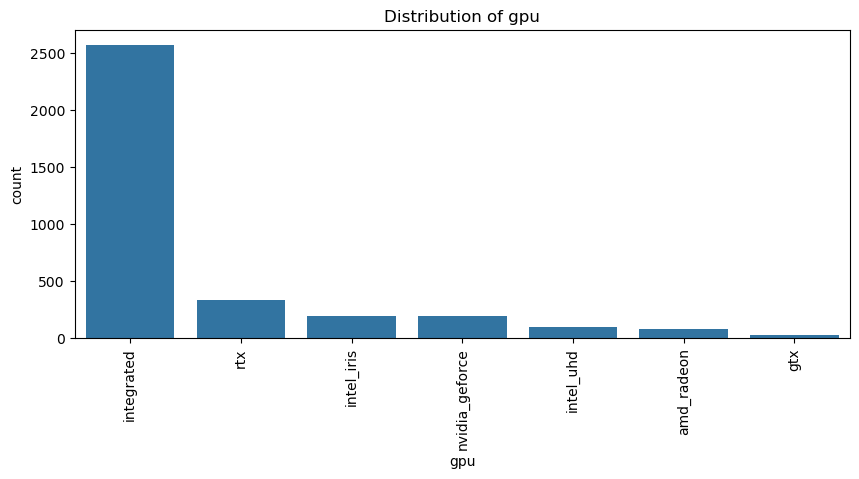

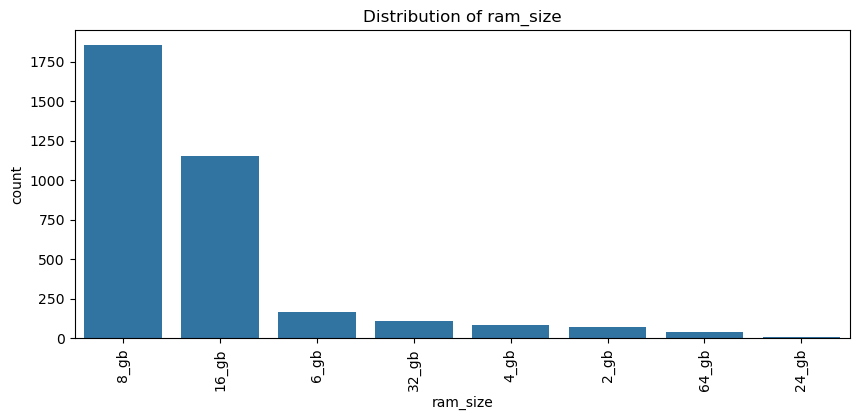

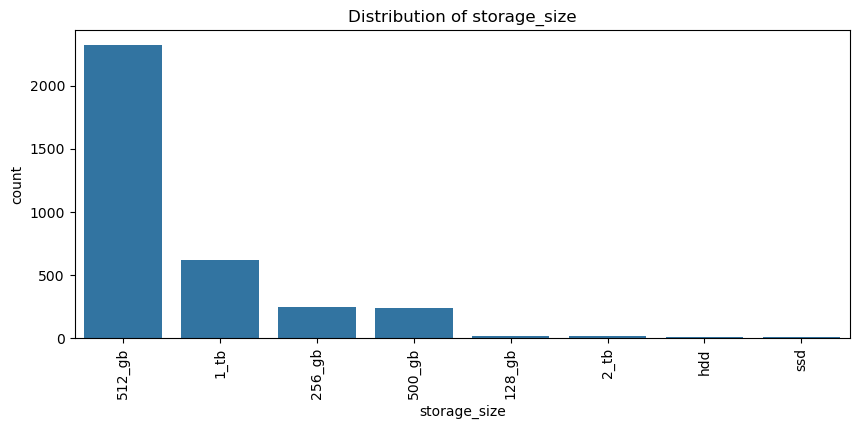

In [110]:
categorical_cols = ['brand', 'processor', 'gpu', 'ram_size', 'storage_size']

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()


In [111]:
df['brand'].unique()

array(['hp', 'msi', 'old', 'microsoft', 'dell', 'lenovo', 'apple', 'acer',
       'asus', 'brother', 'canon', 'intel', 'amd', 'gigabyte',
       'zebronics', 'dynabook', 'laptop', 'sony', 'xiaomi', 'other', 'lg',
       'brand', 'iphone', 'honor', 'samsung', 'crucial', 'avita', 'hcl',
       'toshiba', 'zotac', 'philips', 'technotab'], dtype=object)

In [112]:
## 

In [113]:
# Save the entire cleaned dataset
#df.to_csv('EDA_Project_clean_data_full.csv', index=False)

import os
print("File saved at:", os.path.join(os.getcwd(), 'EDA_Project_clean_data_full.csv'))


File saved at: C:\Users\yedee\EDA_Project_clean_data_full.csv


## 11 PLOTS 2

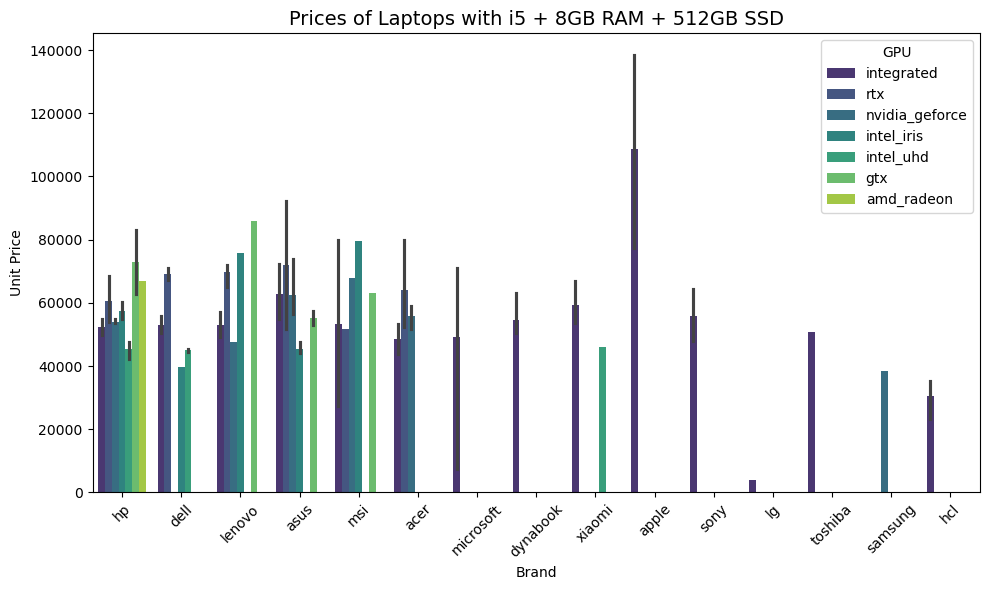

In [114]:

# Filter condition
filtered_df = df[
    (df['processor'] == 'i5') &
    (df['ram_size'] == '8_gb') &
    (df['storage_size'] == '512_gb')
]

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=filtered_df,
    x='brand',
    y='unit_price',
    hue='gpu',
    dodge=True,
    palette='viridis'
)

plt.title('Prices of Laptops with i5 + 8GB RAM + 512GB SSD', fontsize=14)
plt.ylabel('Unit Price')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.legend(title='GPU')
plt.tight_layout()
plt.show()


C:\Users\yedee\AppData\Local\Temp\ipykernel_23776\3261282080.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_gpu, x='brand', y='unit_price', palette="viridis")


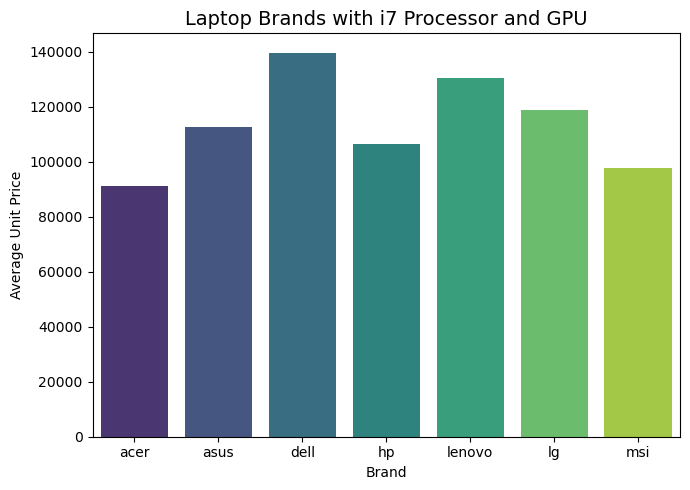

In [115]:

# Filter laptops with i5 and GPU (exclude "integrated" if you want only dedicated GPUs)
filtered_df = df[
    (df['processor'] == 'i7') &
    (df['gpu'].str.lower() != 'integrated')
]

# Group by brand and get average price
brand_gpu = filtered_df.groupby('brand')['unit_price'].mean().reset_index()

# Plot
plt.figure(figsize=(7,5))
sns.barplot(data=brand_gpu, x='brand', y='unit_price', palette="viridis")

plt.title("Laptop Brands with i7 Processor and GPU", fontsize=14)
plt.ylabel("Average Unit Price")
plt.xlabel("Brand")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


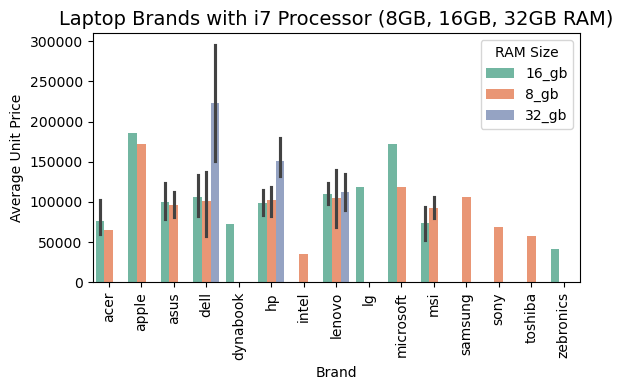

In [116]:

filtered_df = df[
    (df['processor'].str.lower() == 'i7') &
    (df['ram_size'].isin(['8_gb', '16_gb', '32_gb']))
]

# Group by brand and RAM, calculate average price
brand_ram = filtered_df.groupby(['brand', 'ram_size','gpu'])['unit_price'].mean().reset_index()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(data=brand_ram, x='brand', y='unit_price', hue='ram_size', palette="Set2")

plt.title("Laptop Brands with i7 Processor (8GB, 16GB, 32GB RAM)", fontsize=14)
plt.ylabel("Average Unit Price")
plt.xlabel("Brand")
plt.xticks(rotation=90)
plt.legend(title="RAM Size")
plt.tight_layout()
plt.show()


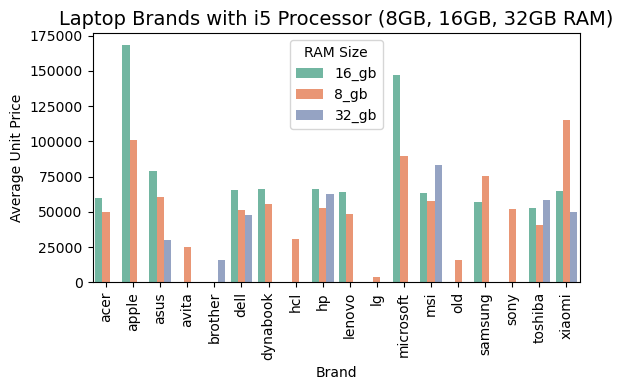

In [117]:

filtered_df = df[
    (df['processor'].str.lower() == 'i5') &
    (df['ram_size'].isin(['8_gb', '16_gb', '32_gb']))
]

# Group by brand and RAM, calculate average price
brand_ram = filtered_df.groupby(['brand', 'ram_size'])['unit_price'].mean().reset_index()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(data=brand_ram, x='brand', y='unit_price', hue='ram_size', palette="Set2")

plt.title("Laptop Brands with i5 Processor (8GB, 16GB, 32GB RAM)", fontsize=14)
plt.ylabel("Average Unit Price")
plt.xlabel("Brand")
plt.xticks(rotation=90)
plt.legend(title="RAM Size")
plt.tight_layout()
plt.show()


Apple Laptops - Processor, RAM, and Price
     processor ram_size  unit_price
16          m4     8_gb      278300
45          m4    16_gb      120500
63          m4    24_gb      133950
75          m4    24_gb      139298
107         m4    16_gb       90980
...        ...      ...         ...
4233        i5     8_gb       84901
4234        i5     8_gb      149901
4238        i5     8_gb       82301
4239        i5     8_gb       65000
4252        i7     8_gb      171634

[153 rows x 3 columns]


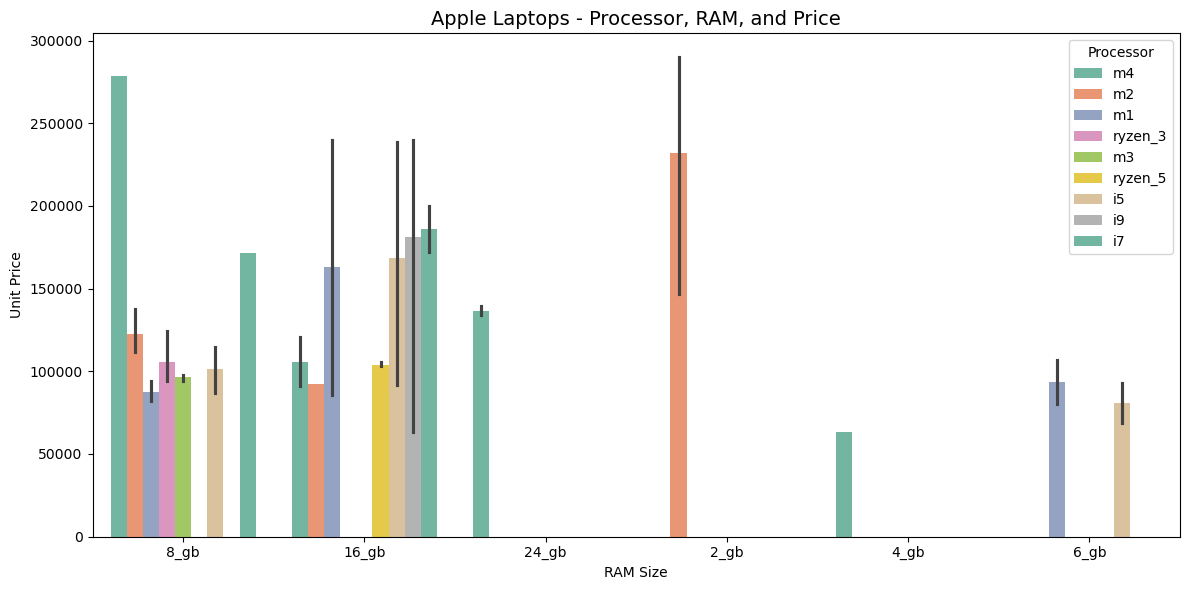

In [118]:


# Filter only Apple brand
apple_df = df[df['brand'].str.lower() == 'apple'][['processor', 'ram_size', 'unit_price']]

print("Apple Laptops - Processor, RAM, and Price")
print(apple_df)

# Plot: Processor + RAM vs Price
plt.figure(figsize=(12,6))
sns.barplot(data=apple_df, x='ram_size', y='unit_price', hue='processor', palette="Set2")

plt.title("Apple Laptops - Processor, RAM, and Price", fontsize=14)
plt.xlabel("RAM Size")
plt.ylabel("Unit Price")
plt.legend(title="Processor")
plt.tight_layout()
plt.show()


Laptops under ₹25,000:
          brand  processor ram_size storage_size         gpu  unit_price
7           old         i5     8_gb       256_gb  integrated       16000
21           hp     athlon     8_gb       256_gb  integrated       21000
37           hp     athlon     8_gb       256_gb  integrated       21000
310      lenovo    ryzen_5     8_gb       512_gb  integrated       24990
317      lenovo         i7    16_gb         1_tb  integrated       16990
...         ...        ...      ...          ...         ...         ...
4668       acer         i5     6_gb       512_gb  integrated       20900
4676     lenovo         i5     8_gb       512_gb  integrated       24500
4677     lenovo  dual_core     8_gb       500_gb  integrated       21500
4684       dell  dual_core    32_gb       512_gb  integrated       23500
4686  technotab         i5     4_gb       512_gb  integrated        5499

[188 rows x 6 columns]


C:\Users\yedee\AppData\Local\Temp\ipykernel_23776\517177103.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=laptops_under_25k, x='brand', order=laptops_under_25k['brand'].value_counts().index, palette="viridis")


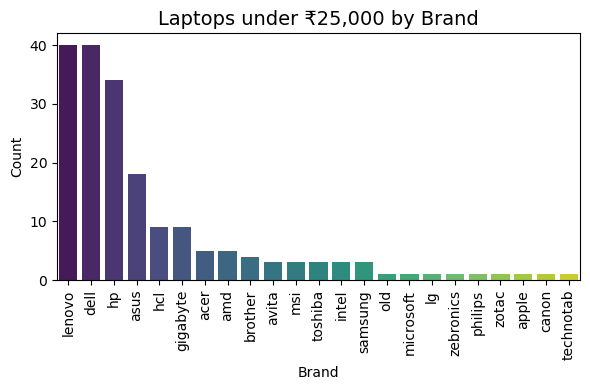

In [129]:


# Filter laptops under 25000
laptops_under_25k = df[df['unit_price'] < 25000][['brand', 'processor', 'ram_size', 'storage_size', 'gpu', 'unit_price']]

print("Laptops under ₹25,000:")
print(laptops_under_25k)

# Plot: Top brands with laptops under 25K
plt.figure(figsize=(6,4))
sns.countplot(data=laptops_under_25k, x='brand', order=laptops_under_25k['brand'].value_counts().index, palette="viridis")

plt.title("Laptops under ₹25,000 by Brand", fontsize=14)
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Laptops between ₹50,000 and ₹100,000:
       brand processor ram_size storage_size             gpu  unit_price
1        msi        i7    64_gb       512_gb  nvidia_geforce       67780
3         hp        i5    16_gb       512_gb      integrated       60200
4         hp        i5     8_gb       512_gb      integrated       54800
9       dell        i5    16_gb       512_gb      integrated       64499
10        hp        i7    16_gb       512_gb      integrated       65500
...      ...       ...      ...          ...             ...         ...
4595      hp        i5     6_gb       512_gb      integrated       71000
4596      hp        i5     8_gb         1_tb      integrated       60000
4610  lenovo        i5     8_gb         1_tb      integrated       54000
4635  lenovo        i7     8_gb         1_tb      integrated       50900
4673      hp        i5     6_gb       512_gb      integrated       69500

[1569 rows x 6 columns]


C:\Users\yedee\AppData\Local\Temp\ipykernel_23776\1568422412.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=laptops_50k_100k, x='brand', order=laptops_50k_100k['brand'].value_counts().index, palette="coolwarm")


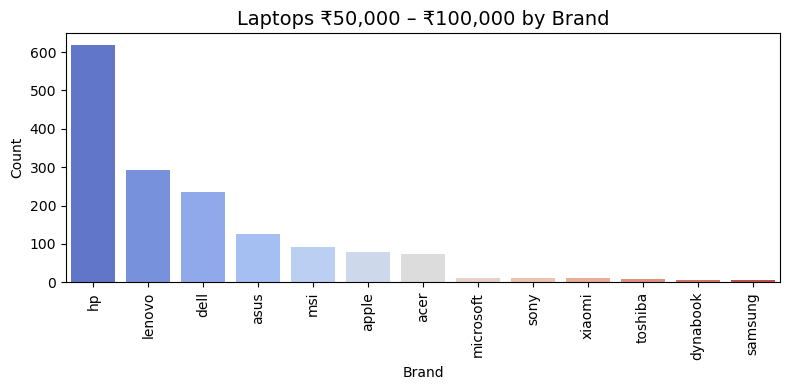

'\n# Plot: Price distribution in this range\nplt.figure(figsize=(10,5))\nsns.histplot(laptops_50k_100k[\'unit_price\'], bins=20, kde=True, color="green")\n\nplt.title("Price Distribution of Laptops (₹50,000 – ₹100,000)", fontsize=14)\nplt.xlabel("Unit Price")\nplt.ylabel("Frequency")\nplt.tight_layout()\nplt.show()'

In [127]:
# Filter laptops between 50K and 1L
laptops_50k_100k = df[(df['unit_price'] >= 50000) & (df['unit_price'] <= 100000)][['brand', 'processor', 'ram_size', 'storage_size', 'gpu', 'unit_price']]

print("Laptops between ₹50,000 and ₹100,000:")
print(laptops_50k_100k)

# Plot: Count of brands in this range
plt.figure(figsize=(8,4))
sns.countplot(data=laptops_50k_100k, x='brand', order=laptops_50k_100k['brand'].value_counts().index, palette="coolwarm")

plt.title("Laptops ₹50,000 – ₹100,000 by Brand", fontsize=14)
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
'''
# Plot: Price distribution in this range
plt.figure(figsize=(10,5))
sns.histplot(laptops_50k_100k['unit_price'], bins=20, kde=True, color="green")

plt.title("Price Distribution of Laptops (₹50,000 – ₹100,000)", fontsize=14)
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()'''


Laptops above ₹100,000:
          brand   processor ram_size storage_size         gpu  unit_price
0            hp     ryzen_5    16_gb         1_tb  integrated      119500
8     microsoft  snapdragon    16_gb       512_gb  integrated      159500
11    microsoft  snapdragon    16_gb       512_gb  integrated      145500
16        apple          m4     8_gb         1_tb  integrated      278300
25           hp          i7     8_gb         1_tb         rtx      109500
...         ...         ...      ...          ...         ...         ...
4417       asus          i7    16_gb         1_tb         gtx      129990
4450    samsung          i7     8_gb       256_gb  integrated      105990
4453    samsung          i5     8_gb       128_gb  integrated      100990
4508       sony     ryzen_3     8_gb       256_gb  integrated      179000
4671       acer          i5     2_gb       512_gb  integrated      104000

[380 rows x 6 columns]


C:\Users\yedee\AppData\Local\Temp\ipykernel_23776\4147273281.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=laptops_above_1L, x='brand', order=laptops_above_1L['brand'].value_counts().index, palette="magma")


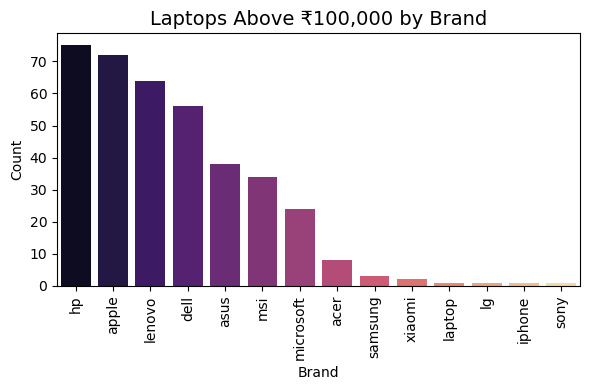

In [128]:


# Filter laptops above 1L
laptops_above_1L = df[df['unit_price'] > 100000][['brand', 'processor', 'ram_size', 'storage_size', 'gpu', 'unit_price']]

print("Laptops above ₹100,000:")
print(laptops_above_1L)

# Plot: Count of brands above 1L
plt.figure(figsize=(6,4))
sns.countplot(data=laptops_above_1L, x='brand', order=laptops_above_1L['brand'].value_counts().index, palette="magma")

plt.title("Laptops Above ₹100,000 by Brand", fontsize=14)
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [122]:
df.head(50)

,product_id,brand,model,processor,ram_size,storage_size,gpu,motherboard,unit_price,ram_size_num
0,0,hp,omnibook_x,ryzen_5,16_gb,1_tb,integrated,No,119500,16
1,1,msi,thin_15,i7,64_gb,512_gb,nvidia_geforce,No,67780,64
2,2,hp,laptop_ep0341tu,i3,8_gb,512_gb,integrated,No,39900,8
3,3,hp,laptop_ep0340tu,i5,16_gb,512_gb,integrated,No,60200,16
4,4,hp,laptop_fd0466tu,i5,8_gb,512_gb,integrated,No,54800,8
5,5,hp,laptop_fc0155au,ryzen_5,8_gb,512_gb,integrated,No,39900,8
6,6,hp,laptop_fd0186tu,i3,8_gb,512_gb,integrated,No,41900,8
7,7,old,laptop_hp,i5,8_gb,256_gb,integrated,No,16000,8
8,8,microsoft,surface_laptop,snapdragon,16_gb,512_gb,integrated,No,159500,16
9,9,dell,inspiron_5430,i5,16_gb,512_gb,integrated,No,64499,16
